In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error


In [2]:
#def linear(x, a, s, d=1, f=1, g=1):
#    return a * x + b


#def quadratic(x, a, b, c, d=1, f=1):
#    return a * x ** 2 + b * x + c


#def cubic(x, a, b, c, d, f=1):
#    return a * x ** 3 + b * x ** 2 + c * x + d


def polynomial(x, a, b, c, d, f):
    return a * x ** 4 + b * x ** 3 + c * x ** 2 + d * x + f

def exp(x, a, b, c=1, d=1, f=1):
    return a * np.exp(x) + b


def ln(x, a, b, c, d=1, f=1):
    return a * np.log(b * x) + c


def sin(x, a, b, c, d, f=1):
    return a * np.sin(b * x + c) + d

In [5]:
dots = 100

# x = np.linspace(-20, 20, dots)
# y = polynomial(x, 0, 0, 0, 1, 0)
# ndistribution = 2


# x = np.linspace(-20, 20, dots)
# y = polynomial(x, 0, 0, 1, 0, 0)
# ndistribution = 30


# x = np.linspace(-20, 20, dots)
# y = polynomial(x, 0, 1, 0, 0, 0)
# ndistribution = 500


# x = np.linspace(-20, 20, dots)
# y = polynomial(x, 1, 0, -1, 0, 0)
# ndistribution = 10000


# x = np.linspace(-1, 13, dots)
# y = exp(x, 1, 0)
# ndistribution = 10000


x = np.linspace(0.1, 20, dots)
y = ln(x, 1, 1, 0)
ndistribution = 1


# x = np.linspace(-2*np.pi, 2*np.pi, dots)
# y = sin(x, 1, 1, 0, 0)
# ndistribution = 1

/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[0.03879516 0.86897726 0.88557121 0.00357478]
ln
[ 0.96806207  2.11896657 -0.71388045  1.          1.        ]


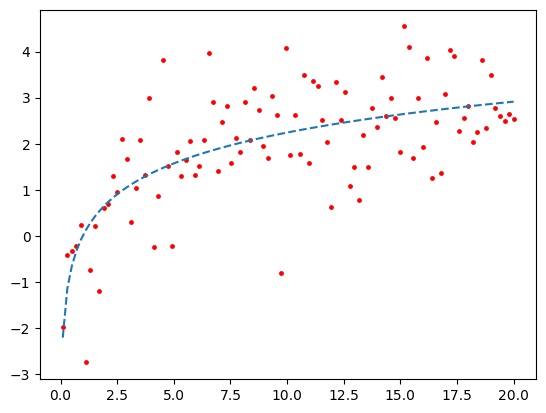

In [6]:
noise = np.array([])
for i in range(len(x)):
    noise = np.append(noise, np.random.normal(y[i], ndistribution, 1)) 
if np.any(x <= 0):
    foo = np.array([polynomial, exp, sin])
else:
    foo = np.array([polynomial, exp, sin, ln])

popt = np.array(
    [[0.0] * 5 for i in range(len(foo))])
#print(popt)

for i in range(len(foo)):
    popt[i] = curve_fit(foo[i], x, noise, maxfev=5000)[0] 
#print(popt)

yreg = foo[0](x, popt[0][0], popt[0][1], popt[0][2], popt[0][3], popt[0][4])
for i in range(1, len(foo)):
    yreg = np.vstack((yreg, foo[i](x, popt[i][0], popt[i][1], popt[i][2], popt[i][3], popt[i][4]))) 

meansquare = np.array([0.0 for i in range(len(foo))])

for i in range(len(foo)):
    meansquare[i] = mean_squared_error(y, yreg[i]) 
print(meansquare)
nfoo = np.argmin(meansquare) 
print(foo[nfoo].__name__, popt[nfoo], sep='\n')

# plt.plot(x, y)
plt.plot(x, foo[nfoo](x, popt[nfoo][0], popt[nfoo][1], popt[nfoo][2], popt[nfoo][3], popt[nfoo][4]), linestyle='dashed')
plt.scatter(x, noise, color='red', s=6)
plt.show()